# Importing Libraries and Data Cleaning+Processing

In [50]:
#Importing all the necessary libraries for this project

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline
from datetime import datetime
import datetime as dt
from wordcloud import WordCloud
import random
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [51]:
#Loading csv data into a dataframe

df = pd.read_csv('NintendoGames.csv')
df

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
0,NaN,Super Mario RPG,Switch,"Nov 17, 2023",NaN,/game/switch/super-mario-rpg,E,['Nintendo'],"['Role-Playing', 'Japanese-Style']"
1,NaN,WarioWare: Move It!,Switch,"Nov 3, 2023",NaN,/game/switch/warioware-move-it!,RP,['Intelligent Systems'],"['Miscellaneous', 'Party / Minigame']"
2,NaN,Super Mario Bros. Wonder,Switch,"Oct 20, 2023",NaN,/game/switch/super-mario-bros-wonder,E,['Nintendo'],"['Action', 'Platformer', '2D']"
3,NaN,Detective Pikachu Returns,Switch,"Oct 6, 2023",NaN,/game/switch/detective-pikachu-returns,NaN,['Creatures Inc.'],"['Adventure', '3D', 'Third-Person']"
4,NaN,Fae Farm,Switch,"Sep 8, 2023",NaN,/game/switch/fae-farm,E10+,['Phoenix Labs'],"['Simulation', 'Virtual', 'Virtual Life']"
...,...,...,...,...,...,...,...,...,...
1089,NaN,Yo-kai Watch 4,Switch,TBA,NaN,/game/switch/yo-kai-watch-4,E10+,['Level 5'],"['Role-Playing', 'Trainer']"
1090,NaN,Splatoon 3: Expansion Pass Wave 2 - Side Order,Switch,TBA,NaN,/game/switch/splatoon-3-expansion-pass-wave-2-...,NaN,['Nintendo'],"['Action', 'Shooter', 'Third-Person', 'Arcade']"
1091,NaN,Mario Kart 8 Deluxe: Booster Course Pass - Wave 6,Switch,TBA,NaN,/game/switch/mario-kart-8-deluxe-booster-cours...,NaN,['Nintendo'],"['Racing', 'Arcade', 'Automobile']"
1092,NaN,Princess Peach for Nintendo Switch,Switch,TBA 2024,NaN,/game/switch/princess-peach-for-nintendo-switch,NaN,['Nintendo'],"['Adventure', 'General']"


In [52]:
#Dropping the esrb_rating column and changing the date column into DateTime format

df.drop(['esrb_rating', 'link'], axis = 1, inplace=True)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [56]:
#Lets check the Missing Data

df.info()

ishowspeed = "----------------------------------------------------\n----------------------------------------------------"
print(ishowspeed)

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   meta_score  709 non-null    float64       
 1   title       1094 non-null   object        
 2   platform    1094 non-null   object        
 3   date        1064 non-null   datetime64[ns]
 4   user_score  856 non-null    float64       
 5   developers  1091 non-null   object        
 6   genres      1094 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 60.0+ KB
----------------------------------------------------
----------------------------------------------------
meta_score null rate: 35.19%
date null rate: 2.74%
user_score null rate: 21.76%
developers null rate: 0.27%


In [57]:
#Filling up the mean and user scores with mean values and TBA dates to the latest dates possible since they will be released in 2024

df['meta_score'] = df['meta_score'].fillna(df['meta_score'].mean())
df['user_score'] = df['user_score'].fillna(df['user_score'].mean())
df['date'] = df['date'].fillna(df['date'].max())

In [58]:
#Dropping the Null Values and Duplicate Rows

df.dropna(inplace=True)
df.drop_duplicates(inplace= True)
df.isnull().sum()

meta_score    0
title         0
platform      0
date          0
user_score    0
developers    0
genres        0
dtype: int64

In [59]:
#Breaking Down the date column into Month, Month Name, and Year columns

df['month_added']=df['date'].dt.month
df['month_name_added']=df['date'].dt.month_name()
df['year_added'] = df['date'].dt.year

In [60]:
#Lets check the dataframe now

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1091 entries, 0 to 1093
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   meta_score        1091 non-null   float64       
 1   title             1091 non-null   object        
 2   platform          1091 non-null   object        
 3   date              1091 non-null   datetime64[ns]
 4   user_score        1091 non-null   float64       
 5   developers        1091 non-null   object        
 6   genres            1091 non-null   object        
 7   month_added       1091 non-null   int64         
 8   month_name_added  1091 non-null   object        
 9   year_added        1091 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 93.8+ KB


# Data Analysis and Visualization

In [61]:
#Checking the statistical data of the dataframe

df.describe()

,meta_score,user_score,month_added,year_added
count,1091.000000,1091.000000,1091.000000,1091.000000
mean,76.083216,7.671612,6.979835,2011.984418
std,8.551629,0.913357,3.438791,6.098032
min,37.000000,3.100000,1.000000,1996.000000
25%,73.000000,7.400000,4.000000,2007.000000
50%,76.083216,7.671612,7.000000,2012.000000
75%,80.000000,8.200000,10.000000,2017.000000
max,99.000000,9.600000,12.000000,2023.000000


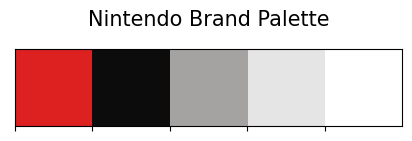

In [62]:
#Let's create the Brand Palette First

palette = sns.palplot(['#dd2020','#0d0c0c', '#a5a2a2', '#e5e5e5','#ffffff'])
plt.title("Nintendo Brand Palette", loc='center',fontfamily='Sans-serif',fontsize=15,y=1.2)
plt.show()

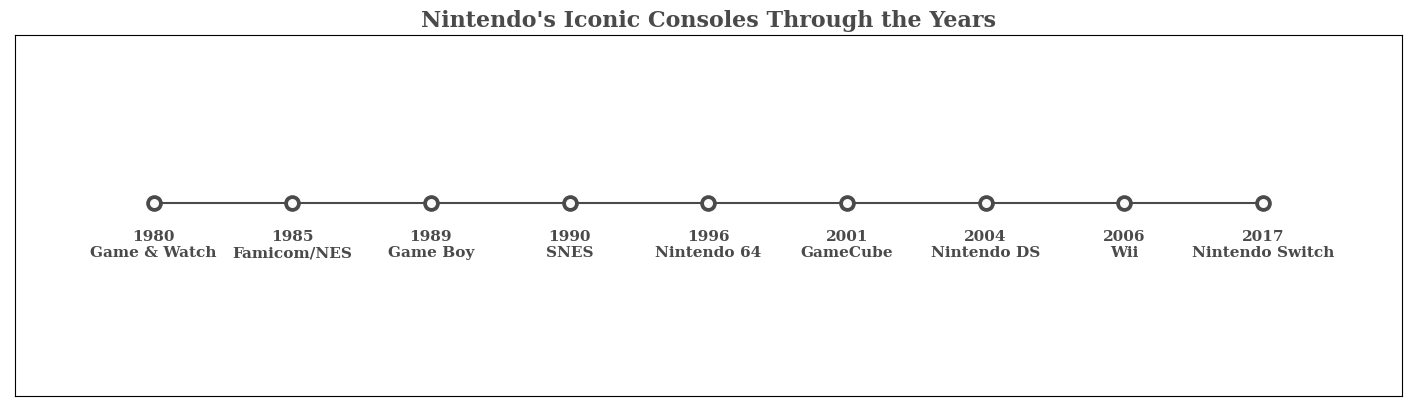

In [63]:
#Let's create a Timeline Chart for Nintendo's Gaming System
# Timeline code copied from Subin An's awesome notebook https://www.kaggle.com/subinium/awesome-visualization-with-titanic-dataset

tl_dates = [
    "1980\nGame & Watch",
    "1985\nFamicom/NES",
    "1989\nGame Boy",
    "1990\nSNES",
    "1996\nNintendo 64",
    "2001\nGameCube",
    "2004\nNintendo DS",
    "2006\nWii",
    "2017\nNintendo Switch"
]

tl_x = [1, 2, 3, 4, 5, 6, 7, 8, 9]


# Set figure & Axes
fig, ax = plt.subplots(figsize=(14, 4), constrained_layout=True)
ax.set_ylim(-2, 1.75)
ax.set_xlim(0, 10)

# Timeline : line
ax.axhline(0, xmin=0.1, xmax=0.9, c='#4a4a4a', zorder=1)

# Timeline : Date Points
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)

# Date Text
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.55, date, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a',fontsize=11)

# Ticks    
ax.set_xticks([]) 
ax.set_yticks([]) 

# Title
ax.set_title("Nintendo's Iconic Consoles Through the Years", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')

plt.show()

In [64]:
#Let's visualize the count of Games made for Nintendo's Consoles

df_platitles = df.groupby(['platform'], as_index=False)['title'].count().sort_values(by='title', ascending=False)
fig1 = px.bar_polar(df_platitles, r="title", theta="platform", color="platform", template="presentation", color_discrete_sequence=['#dd2020', '#0d0c0c', '#a5a2a2', '#e5e5e5'], labels={"platform":"Consoles"}, title='<b>Number of Games Made for Different Consoles</b>')
fig1.update_layout(title_font_family="Sans-serif",title_font_size=25,legend_font_size=14)
fig1.show()

In [65]:
#Let's visualize the average meta score for the different Consoles of Nintendo

df_metaplat = df.groupby(['platform'], as_index=False)['meta_score'].mean().sort_values(by='meta_score', ascending=False)
fig2 = px.scatter(df_metaplat, x = 'platform', y = 'meta_score', symbol = 'platform', size = 'meta_score', template="presentation", color = 'platform', color_discrete_sequence=['#dd2020', '#0d0c0c', '#a5a2a2', '#e5e5e5'], labels={"platform":"Consoles", "meta_score":"Meta Score"}, title='<b>Average Meta Score Rating for Different Consoles</b>')
fig2.update_layout(title_font_family="Sans-serif",title_font_size=25,legend_font_size=14)
fig2.update_traces(marker=dict(line=dict(width=2, color='Black')), selector=dict(mode='markers'))
fig2.show()

In [66]:
#Let's visualize the average user score for the different Consoles of Nintendo

df_userplat = df.groupby(['platform'], as_index=False)['user_score'].mean().sort_values(by='user_score', ascending=False)
fig3 = px.scatter(df_userplat, x = 'platform', y = 'user_score', symbol = 'platform', size = 'user_score', template="presentation", color = 'platform', color_discrete_sequence=['#dd2020', '#0d0c0c', '#a5a2a2', '#e5e5e5'], labels={"platform":"Consoles", "user_score":"User Score"}, title='<b>Average User Score Rating for Different Consoles</b>')
fig3.update_layout(title_font_family="Sans-serif",title_font_size=25,legend_font_size=14)
fig3.update_traces(marker=dict(line=dict(width=2, color='Black')), selector=dict(mode='markers'))
fig3.show()

In [67]:
#Let's visualize the number of Nintendo games released every year

df_gameyear = df.groupby(['year_added'], as_index=False)['title'].count().sort_values(by='year_added', ascending=True)
fig4 = px.bar(df_gameyear, x='year_added', y='title', template="presentation", color_discrete_sequence=['#dd2020'], labels={"title":"Count of Games", "year_added":"Year of Release"}, title='<b>Number of Games Released Every Year</b>')
fig4.update_traces(marker_line_color='black', marker_line_width=1.5, text=df_gameyear['title'], textposition='outside', textfont=dict(size=15))
fig4.update_layout(title_font_family="Sans-serif", title_font_size=25)
fig4.show()

In [68]:
#Let's visualize the changes in scores of the Nintendo games released every year

df_scoreyears = df.groupby(['year_added'], as_index=False)[['meta_score', 'user_score']].mean().sort_values(by='year_added', ascending=True)

#Since user_score is in different scales, lets equalize it in the scale of 100 as meta_score

df_scoreyears['user_score'] = (df_scoreyears['user_score'] * 10)

fig5 = px.line(df_scoreyears, x = 'year_added', y = ['meta_score', 'user_score'], markers=True, template="presentation", color_discrete_sequence=['#dd2020', '#0d0c0c'], labels={"value":"Average Score", "variable":"Scores", "meta_score":"Meta Score", "user_score":"User Score", "year_added":"Year of Release"}, title='<b>Change in Scores Over the Years</b>')
fig5.update_layout(title_font_family="Sans-serif",title_font_size=25,legend_font_size=14)
fig5.show()

In [69]:
#Let's visualize the top 10 developers with most games made

df_devgames = df.groupby(['developers'], as_index=False)['title'].count().sort_values(by='title', ascending=True).tail(10)
df_devgames['developers'] = df_devgames['developers'].astype(str).str.replace(r'[\[\]\'\"]', '', regex=True)

# Create text combining developer names and count of titles
text_data = df_devgames['developers'] + ': ' + df_devgames['title'].astype(str)

fig6 = px.bar(df_devgames, x='title', y='developers',template="presentation", color_discrete_sequence=['#dd2020'], labels={"title":"Count of Games", "developers":"Developers"}, title='<b>Top 10 Developers With Most Games Made</b>')
fig6.update_traces(marker_line_color='black', marker_line_width=1.5, text=text_data, textposition='outside', textfont=dict(size=15))
fig6.update_layout(title_font_family="Sans-serif", title_font_size=25, xaxis=dict(range=[0, 420]), yaxis=dict(showticklabels=False))
fig6.show()


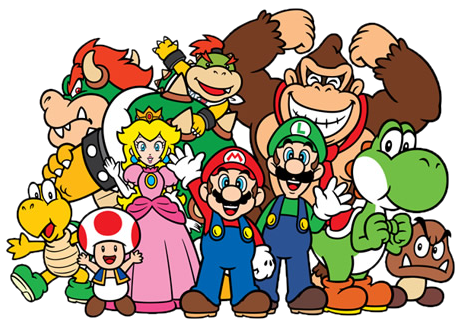

In [70]:
#Let's visualize the months with most games released

df_monthrel = df.groupby(['month_added','month_name_added'], as_index=False)['title'].count().sort_values(by='title', ascending=False)
fig7 = px.pie(df_monthrel, values='title', names='month_name_added', template="presentation", color = 'month_name_added', color_discrete_sequence=px.colors.sequential.Reds_r, title='<b>Months With Most Games Released</b>', hole=0.45)
fig7.update_traces(marker_line_color='black', marker_line_width=1.5, text=df_monthrel['month_name_added'], insidetextorientation='radial', textposition='inside', textfont=dict(size=15))
fig7.update_layout(title_font_family="Sans-serif", title_font_size=25)

#Lets add an Image at the center of the Donut Chart just because we can ( ͡° ͜ʖ ͡°) 
img = Image.open('ninchar.png')
fig7.add_layout_image(dict(source=img, xref="paper", yref="paper", x=0.5, y=0.5, sizex=0.3, sizey=0.3, xanchor="center", yanchor="middle"))

fig7.show()

In [71]:
#Let's visualize the average meta_score & user_score ratings for games released every month

df_scoresmonth=df.groupby(['month_added','month_name_added'], as_index=False)[['meta_score','user_score']].mean().sort_values(by='month_added', ascending=True)

#Since user_score is in different scales, lets equalize it in the scale of 100 as meta_score and round off both into 2 decimal places

df_scoresmonth['meta_score'] = (df_scoresmonth['meta_score']).round(2)
df_scoresmonth['user_score'] = (df_scoresmonth['user_score'] * 10).round(2)

fig8 = px.histogram(df_scoresmonth, x='month_name_added', y=['meta_score','user_score'], text_auto=True, template="presentation", color_discrete_sequence=['#dd2020', '#0d0c0c'], barmode='group', labels={"variable":"Scores", "month_name_added":"Month of Release"}, title='<b>Average Meta and User Scores of Games Released Each Month</b>')
fig8.update_traces(marker_line_color='#a5a2a2', marker_line_width=1.5)
fig8.update_layout(title_font_family="Sans-serif", title_font_size=25, yaxis_title="Average Score Ratings")
fig8.show()

In [72]:
#Let's check the distribution of meta_score & user_score ratings across the Nintendo Consoles
#Let's create a dataframe containing only the platform, meta_score, & user_score columns

df_devscore = df[['platform', 'meta_score', 'user_score']].sort_values(by='platform', ascending=True)

#Since user_score is in different scales, lets equalize it in the scale of 100 as meta_score and round off both into 2 decimal places

df_devscore['meta_score'] = (df_devscore['meta_score']).round(2)
df_devscore['user_score'] = (df_devscore['user_score'] * 10).round(2)

In [73]:
#Let's visualize the Distribution of meta_score across the different Nintendo Consoles

fig9 = px.box(df_devscore, x= 'platform', y='meta_score', color = 'platform', template="presentation", color_discrete_sequence=['#dd2020','#0d0c0c', '#a5a2a2'], labels={"platform":"Consoles", "meta_score":"Meta Score"}, title='<b>Distribution of Meta Scores Across Nintendo Consoles</b>')
fig9.update_traces(marker_line_color='#a5a2a2', marker_line_width=1.5)
fig9.update_layout(title_font_family="Sans-serif", title_font_size=25)
fig9.show()

In [74]:
#Let's visualize the Distribution of user_score across the different Nintendo Consoles

fig10 = px.box(df_devscore, x= 'platform', y='user_score', color = 'platform', template="presentation", color_discrete_sequence=['#dd2020','#0d0c0c', '#a5a2a2'], labels={"platform":"Consoles", "user_score":"User Score"}, title='<b>Distribution of User Scores Across Nintendo Consoles</b>')
fig10.update_traces(marker_line_color='#a5a2a2', marker_line_width=1.5)
fig10.update_layout(title_font_family="Sans-serif", title_font_size=25)
fig10.show()

In [75]:
#Let's visualize the number of games with an average score of 90 and above based on Console

df_para = df[['title', 'platform', 'user_score', 'meta_score']].copy()
df_para.loc[:, 'meta_score'] = df_para['meta_score'].round(2)
df_para.loc[:, 'user_score'] = (df_para['user_score'] * 10).round(2)
df_para.loc[:, 'Average Score'] = (df_para['meta_score'] + df_para['user_score']) / 2
df_para2 = df_para.groupby(['title', 'platform'], as_index=False)['Average Score'].mean().sort_values(by='Average Score', ascending=False).head(41)
fig11 = px.parallel_categories(df_para2, dimensions=['platform', 'Average Score'], color='Average Score', color_continuous_scale=['#dd2020', '#0d0c0c', '#a5a2a2', '#e5e5e5'], template="presentation", labels={"platform": "Console", "Average Score": "Score"}, title='<b>Games with Average Score of 90 & Above Based on Console</b>')
fig11.update_layout(title_font_family="Sans-serif", title_font_size=25)
fig11.show()

# Conclusion